# Getting Started with EDA-Schema

Welcome to the tutorial for **EDA-schema**, a property graph data-model schema designed to represent digital circuit designs and their attributes. This notebook aims to guide you through the key features and functionalities of EDA-schema, providing hands-on examples to help you understand how to use this library effectively.

EDA-schema is developed to standardize graph structures and feature sets for digital circuits, using data from the IWLS'05 benchmark circuit suite and the Skywater 130 nm Process Design Kit (PDK). The dataset includes physical designs generated by the open-source toolset OpenROAD.

In this tutorial, you will learn:
1. The basics of EDA-schema.
2. How to work with the open dataset provided.
3. How to represent and analyze digital circuits using the property graph data model.

Let's get started!

---
### Setting Up the Environment

In this section, we will import the necessary libraries and create the dataset object required for working with EDA-schema. This step is crucial as it sets up the environment and establishes a connection to the MongoDB database where our dataset is stored.

#### Importing Libraries

We start by importing several libraries that will be used throughout the notebook. These include libraries for data manipulation, visualization, and interaction with the EDA-schema.

In [2]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.patches as mpatches
from networkx.drawing.nx_agraph import graphviz_layout

from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

import warnings
warnings.filterwarnings('ignore')

#### Creating the Dataset Object

Next, we create an instance of the `MongoDB` class, which connects to our MongoDB database containing the dataset. 
This initializes a connection to the MongoDB database named "iwls05_sky130_openroad_minimal".

Next, we create a `Dataset` object using this MongoDB instance. Dataset object allows us to interact with the data stored in MongoDB.

With these steps, our environment is now set up and ready for exploring and analyzing digital circuit designs using EDA-schema.

In [3]:
dataset = Dataset(SQLitePickleDB("../test_data/eda_schema_barelypass_subset"))

### Loading a Netlist

A netlist, identified by attributes such as the circuit name, netlist ID, and design phase, is loaded from the database into an EDA-schema netlist graph object to extract specific details about the digital circuit.

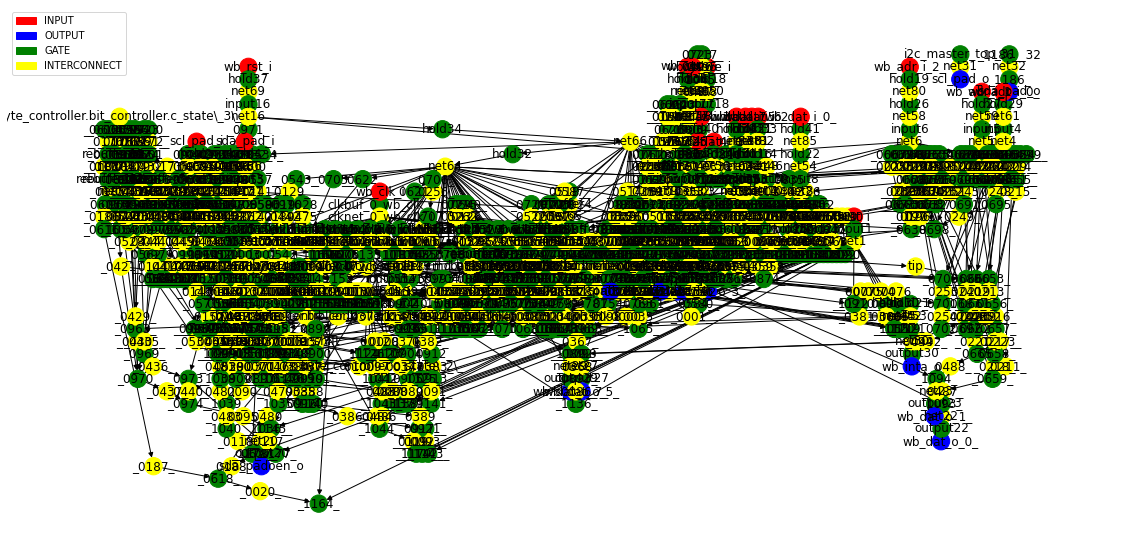

In [ ]:
plt.figure(figsize=(20, 10))
dataset.load_dataset(circuit="i2c", netlist_id='id-000001', phase="detailed_route")
netlist = dataset[('i2c', 'id-000001', 'detailed_route')]
netlist.plot(filter_regex="FILLER")

Once the netlist is loaded, various attributes can be accessed to get detailed information about the digital circuit.

- **Width**: The width of the circuit.
- **Height**: The height of the circuit.
- **Number of inputs**: The number of input pins in the circuit.
- **Number of outputs**: The number of output pins in the circuit.
- **Cell Density**: The density of cells (components) in the circuit.
- **Pin Density**: The density of pins in the circuit.
- **Net Density**: The density of nets (connections) in the circuit.

These attributes provide a comprehensive overview of the circuit's physical and structural properties, enabling further analysis and optimization.

In [ ]:
print("Width:", netlist.width)
print("Height:", netlist.height)
print("Number of inputs:", netlist.no_of_inputs)
print("Number of outputs:", netlist.no_of_outputs)
print("Cell Density:", netlist.cell_density)
print("Pin Density:", netlist.pin_density)
print("Net Density:", netlist.net_density)

Width: 157.31
Height: 157.31
Number of inputs: 19
Number of outputs: 14
Cell Density: 0.11691513088390657
Pin Density: 0.3025002934616739
Net Density: 0.07207418711116328


### Exploring Netlist Graph Entities

A netlist graph in EDA-schema includes inputs, outputs, gates, and interconnects. Each entity type provides specific details about the digital circuit's structure and properties.

#### Input Entity

An input entity represents an input pin of the circuit. Here is an example of how to access and print details of an input entity:
- **Input name**: Name of the input pin.
- **Direction**: Direction of the signal (input).
- **Coordinate**: (x, y) position of the input pin.
- **Capacitance**: Capacitance of the input pin.


In [ ]:
input_name = "arst_i"
input_entity = netlist.nodes[input_name]["entity"]
print("Input name:", input_entity.name)
print("Direction:", input_entity.direction)
print("Co-ordinate:", input_entity.x, input_entity.y)
print("Capacitance:", input_entity.capacitance)

Input name: arst_i
Direction: INPUT
Co-ordinate: 156.91 12.58
Capacitance: 0.00126114


#### Output Entity

An output entity represents an output pin of the circuit. Here is an example of how to access and print details of an output entity:

- **Output name**: Name of the output pin.
- **Direction**: Direction of the signal (output).
- **Coordinate**: (x, y) position of the output pin.
- **Capacitance**: Capacitance of the output pin.


In [ ]:
output_name = "scl_pad_o"
output_entity = netlist.nodes[output_name]["entity"]
print("Output name:", output_entity.name)
print("Direction:", output_entity.direction)
print("Co-ordinate:", output_entity.x, output_entity.y)
print("Capacitance:", output_entity.capacitance)

Output name: scl_pad_o
Direction: OUTPUT
Co-ordinate: 11.27 0.242
Capacitance: None


#### Gate Entity

A gate entity represents a logic gate in the circuit. Here is an example of how to access and print details of a gate entity:

- **Gate name**: Name of the gate.
- **Standard Cell**: Type of standard cell used for the gate.
- **Coordinate**: (x, y) position of the gate.
- **Number of fanins/fanouts**: Count of input and output connections.

In [ ]:
gate_name = "_0540_"
gate_entity = netlist.nodes[gate_name]["entity"]
gate_entity
print("Gate name:", gate_entity.name)
print("Standard Cell:", gate_entity.standard_cell)
print("Co-ordinate:", gate_entity.x, gate_entity.y)
print("No. of fanins/fanouts:", gate_entity.no_of_fanins, gate_entity.no_of_fanouts)

Gate name: _0540_
Standard Cell: sky130_fd_sc_hd__nor2_1
Co-ordinate: 37.72 46.24
No. of fanins/fanouts: 0 1


#### Net Entity

A net entity represents an interconnect between components in the circuit. Here is an example of how to access and print details of a net entity:

- **Net name**: Name of the net.
- **Half Perimeter Wirelength (HPWL)**: Measure of the net's wirelength.
- **Bounding box**: Coordinates defining the net's bounding box.
- **Number of inputs/outputs**: Count of input and output connections.

In [ ]:
net_name = "_0328_"
net_entity = netlist.nodes[net_name]["entity"]
print("Net name:", net_name)
print("Half Perimeter Wirelength (HPWL):", net_entity.hpwl)
print("Interconnect Length:", net_entity.length)
print("Bounding box:", net_entity.x_min, net_entity.y_min, net_entity.x_max, net_entity.y_max)
print("No. of inputs/outputs:", net_entity.no_of_inputs, net_entity.no_of_outputs)

Net name: _0328_
Half Perimeter Wirelength (HPWL): None
Interconnect Length: 80.03999999999999
Mounding box: 48.53 64.09 56.81 134.47
No. of inputs/outputs: 1 2


The interconnect entity in a netlist graph is composed of interconnect nodes, each representing a segment of the connection between components in the circuit.
To retrieve and display information about the interconnect nodes, the `net_entity.nodes` dictionary is iterated over, and details of each node are collected into a DataFrame.
The resulting DataFrame provides a detailed view of each interconnect node, showing the following attributes:

- **length**: The length of the interconnect segment.
- **x1, y1**: The starting coordinates of the interconnect segment.
- **x2, y2**: The ending coordinates of the interconnect segment.
- **x, y**: The coordinates of the interconnect node.

,length,x1,y1,x2,y2,x,y
name,,,,,,,
_0328__0,45.22,51.29,64.09,51.29,109.31,51.29,86.70
_0328__1,2.76,48.53,64.09,51.29,64.09,49.91,64.09
_0328__2,1.84,54.97,109.99,56.81,109.99,55.89,109.99
_0328__3,0.34,54.97,109.65,54.97,109.99,54.97,109.82
_0328__4,3.68,51.29,109.65,54.97,109.65,53.13,109.65
_0328__5,0.34,51.29,109.31,51.29,109.65,51.29,109.48
_0328__6,1.38,55.43,134.47,56.81,134.47,56.12,134.47
_0328__7,24.48,56.81,109.99,56.81,134.47,56.81,122.23


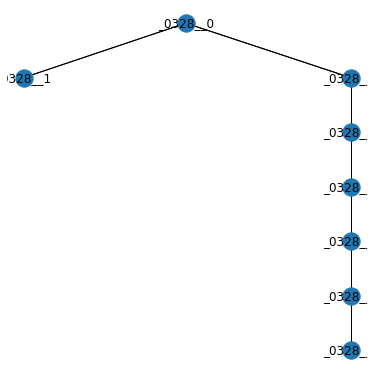

In [ ]:
import networkx as nx
import matplotlib.patches as mpatches

from networkx.drawing.nx_agraph import graphviz_layout
plt.figure(figsize=(5, 5))
color_map = []

pos = graphviz_layout(net_entity, prog="dot")
nx.draw(net_entity, pos, with_labels=True, arrows=False)

data = []
for node in net_entity.nodes:
    data.append(net_entity.nodes[node]["entity"].asdict())
pd.DataFrame(data).set_index("name")[['length', 'x1', 'y1', 'x2', 'y2', 'x', 'y']]

### Netlist Quality Metrics

Each netlist has associated quality metrics that provide detailed information about its performance, area, power consumption, and critical paths. The following sections show how to print these metrics.

#### Area Metrics

The area metrics provide information about the physical area occupied by various components in the circuit.

In [ ]:
print("Combinational cell area:", netlist.area_metrics.combinational_cell_area)
print("Sequential cell area:", netlist.area_metrics.sequential_cell_area)
print("Buffer area:", netlist.area_metrics.buffer_area)
print("Inverter area:", netlist.area_metrics.inverter_area)
print("Macro area:", netlist.area_metrics.macro_area)
print("Cell area:", netlist.area_metrics.cell_area)
print("Net area:", netlist.area_metrics.net_area)
print("Total area:", netlist.area_metrics.total_area)

Combinational cell area: 5203.740800000017
Sequential cell area: 3315.6799999999953
Buffer area: 1005.9647999999999
Inverter area: 60.05759999999999
Macro area: 0
Cell area: 8519.420800000064
Net area: 0
Total area: 8519


#### Power Metrics

The power metrics provide information about the power consumption of various components in the circuit.

In [ ]:
print("Combinational power:", netlist.power_metrics.combinational_power)
print("Sequential power:", netlist.power_metrics.sequential_power)
print("Macro power:", netlist.power_metrics.macro_power)
print("Internal power:", netlist.power_metrics.internal_power)
print("Switching power:", netlist.power_metrics.switching_power)
print("Leakage power:", netlist.power_metrics.leakage_power)
print("Total power:", netlist.power_metrics.total_power)

Combinational power: 0.000536
Sequential power: 0.00234
Macro power: 0.0
Internal power: 0.00375
Switching power: 0.000786
Leakage power: 3.49e-09
Total power: 0.00453


#### Cell Metrics

The cell metrics provide information about the number and types of cells used in the circuit.

In [ ]:
print("Number of combinational cells:", netlist.cell_metrics.no_of_combinational_cells)
print("Number of sequential cells:", netlist.cell_metrics.no_of_sequential_cells)
print("Number of buffers:", netlist.cell_metrics.no_of_buffers)
print("Number of inverters:", netlist.cell_metrics.no_of_inverters)
print("Number of macros:", netlist.cell_metrics.no_of_macros)
print("Number of total cells:", netlist.cell_metrics.no_of_total_cells)

Number of combinational cells: 867
Number of sequential cells: 129
Number of buffers: 82
Number of inverters: 16
Number of macros: 0
Number of total cells: 996


#### Critical Path Metrics

The critical path metrics provide information about the timing performance of the circuit, highlighting the longest path delays and potential timing violations.

In [ ]:
print("Startpoint:", netlist.critical_path_metrics.startpoint)
print("Endpoint:", netlist.critical_path_metrics.endpoint)
print("Worst arrival time:", netlist.critical_path_metrics.worst_arrival_time)
print("Worst slack:", netlist.critical_path_metrics.worst_slack)
print("Total negative slack:", netlist.critical_path_metrics.total_negative_slack)
print("Number of timing paths:", netlist.critical_path_metrics.no_of_timing_paths)
print("Number of slack violations:", netlist.critical_path_metrics.no_of_slack_violations)

Startpoint: _1147_
Endpoint: _1162_
Worst arrival time: 2.1226871
Worst slack: 0.06576273
Total negative slack: 0
Number of timing paths: 833
Number of slack violations: 0


### Timing Path Entities

Netlist also includes a dictionary of timing path entities, where each key is a tuple consisting of the start and end points of a timing path. This provides detailed information about the timing performance of specific paths in the circuit.

#### Accessing a Timing Path Entity

To access a specific timing path entity, the start and end points of the timing path are used as keys in the `timing_paths` dictionary. Here is how to retrieve and print details of a timing path entity:

- **Startpoint**: The starting point of the timing path.
- **Endpoint**: The ending point of the timing path.
- **Path Type**: The type of the timing path (e.g., setup, hold).
- **Arrival Time**: The arrival time of the signal at the endpoint.
- **Required Time**: The required arrival time for the signal to meet the timing constraints.
- **Slack**: The difference between the required time and the actual arrival time (positive slack indicates the path meets timing requirements).
- **Number of gates**: The number of gates along the timing path.
- **Is critical path**: Indicates if this timing path is the critical path (the longest path in terms of delay).

In [ ]:
startpoint, endpoint, path_type = '_1162_', '_1158_', "max"
timing_path_entity = netlist.timing_paths[(startpoint, endpoint, path_type)][0]

print("Startpoint:", timing_path_entity.startpoint)
print("Endpoint:", timing_path_entity.endpoint)
print("Path Type:", timing_path_entity.path_type)
print("Arrival Time:", timing_path_entity.arrival_time)
print("Required Time:", timing_path_entity.required_time)
print("Slack:", timing_path_entity.slack)
print("Number of gates:", timing_path_entity.no_of_gates)
print("Is critical path:", timing_path_entity.is_critical_path)

Startpoint: _1162_
Endpoint: _1158_
Path Type: max
Arrival Time: 1.89538896
Required Time: 2.19063091
Slack: 0.29524183
Number of gates: 13
Is critical path: False


### Timing Path Graph with Timing Points

A timing path is represented as a graph composed of timing points. Each timing point provides detailed information about delays, transitions, and other timing characteristics along the path.

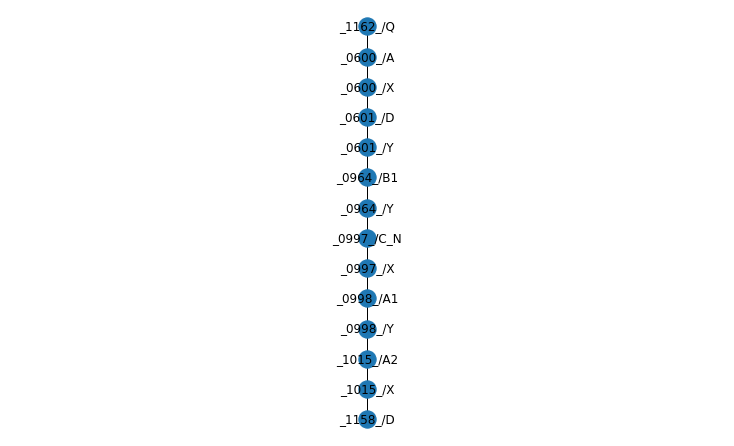

In [ ]:
plt.figure(figsize=(10, 6))
timing_path_entity.plot()

#### Accessing Timing Point Details

To retrieve and display information about the timing points in a timing path, the nodes of the `timing_path_entity` are iterated over, and details of each timing point are collected into a DataFrame.

- **Name**: Name of the timing point.
- **Cell delay**: Delay introduced by the cell at this timing point.
- **Arrival time**: Arrival time of the signal at this timing point.
- **Slew**: Transition time of the signal at this timing point.
- **Is rise transition**: Boolean indicating if the transition is a rise.
- **Is fall transition**: Boolean indicating if the transition is a fall.
- **Node depth**: Depth of the node in the timing path.


The resulting DataFrame provides a detailed view of each timing point in the timing path.

In [ ]:
import pandas as pd

data = []

for node in timing_path_entity.nodes:
    timing_point_entity = timing_path_entity.nodes[node]["entity"]
    data.append(timing_point_entity.asdict())

pd.DataFrame(data).set_index("name")

,gate,standard_cell,pin,cell_delay,arrival_time,slew,is_rise_transition,is_fall_transition,node_depth
name,,,,,,,,,
_1162_/Q,_1162_,sky130_fd_sc_hd__dfrtp_4,Q,0.489823,0.499823,0.088509,False,True,0
_0600_/A,_0600_,sky130_fd_sc_hd__or4_1,A,0.000000,0.499823,0.088509,False,True,1
_0600_/X,_0600_,sky130_fd_sc_hd__or4_1,X,0.572750,1.072573,0.119142,False,True,2
_0601_/D,_0601_,sky130_fd_sc_hd__nor4_4,D,0.000000,1.072573,0.119142,False,True,3
_0601_/Y,_0601_,sky130_fd_sc_hd__nor4_4,Y,0.205935,1.278509,0.263803,True,False,4
_0964_/B1,_0964_,sky130_fd_sc_hd__o21ai_2,B1,0.000000,1.278509,0.263803,True,False,5
_0964_/Y,_0964_,sky130_fd_sc_hd__o21ai_2,Y,0.110420,1.388929,0.082910,False,True,6
_0997_/C_N,_0997_,sky130_fd_sc_hd__or3b_2,C_N,0.000000,1.388929,0.082910,False,True,7
_0997_/X,_0997_,sky130_fd_sc_hd__or3b_2,X,0.246922,1.635851,0.093328,True,False,8


### Working with Graph and Tabular Data

EDA-schema provides flexibility in working with both graph and tabular data formats. Graph entities are ideal for graph operations like traversals, while tabular data is beneficial for relational operations such as joins, groups, and filters. All entity attributes are available in a tabular format as pandas DataFrames, which allows for efficient data manipulation and analysis.

#### Accessing Tabular Data

Entity attributes can be accessed in a tabular format using the `get_table_data` method from the `MongoDB` object. Here is how to retrieve the tabular data for netlists:

In [ ]:
# Accessing all netlists data in tabular format
netlists_data = dataset.db.get_table_data("netlists")
netlists_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,tv80,id-000001,floorplan,348.61,348.61,14.0,32.0,5681.0,3983.0,30.0,0.164305,0.472929,0.115196
1,tv80,id-000001,global_place,348.61,348.61,14.0,32.0,5681.0,3983.0,30.0,0.164305,0.472929,0.115196
2,tv80,id-000001,detailed_place,348.61,348.61,14.0,32.0,5745.0,4046.0,39.0,0.130069,0.373112,0.091603
3,tv80,id-000001,cts,348.61,348.61,14.0,32.0,6031.0,4328.0,42.0,0.125614,0.355619,0.090144
4,tv80,id-000001,global_route,348.61,348.61,14.0,32.0,6080.0,4364.0,43.0,0.124549,0.351565,0.089397


The resulting `netlists_data` is a pandas DataFrame containing all the attributes of the netlists in a tabular format.

#### Filtering Tabular Data

Tabular data can be filtered based on specific conditions. For example, to filter netlists by the "detailed_route" phase:

In [ ]:
# Filtering netlists data by the "route" phase
netlists_route_data = dataset.db.get_table_data("netlists", phase="detailed_route")
netlists_route_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,tv80,id-000001,detailed_route,348.61,348.61,14.0,32.0,17061.0,4364.0,43.0,0.124549,0.351565,0.089397
1,i2c,id-000001,detailed_route,157.31,157.31,19.0,14.0,2990.0,614.0,40.0,0.116915,0.302500,0.072074
2,mem_ctrl,id-000001,detailed_route,424.51,424.51,115.0,152.0,24598.0,5014.0,41.0,0.118882,0.303249,0.072243
3,simple_spi,id-000001,detailed_route,148.99,148.99,16.0,12.0,2642.0,455.0,39.0,0.110497,0.262633,0.061312
4,systemcaes,id-000001,detailed_route,401.66,401.66,260.0,129.0,22188.0,5342.0,43.0,0.121742,0.312520,0.081000


To filter netlists by the "detailed_route" phase for "aes_core" circuits.

In [ ]:
# Filtering netlists data by the "route" phase
netlists_route_data = dataset.db.get_table_data("netlists", phase="detailed_route", circuit="aes_core")
netlists_route_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,aes_core,id-000001,detailed_route,545.595,545.595,259.0,129.0,43542.0,12535.0,45.0,0.130124,0.375546,0.096686


### Combining Graph and Tabular Data Operations

By combining graph operations and tabular data manipulations, comprehensive analysis and optimization of digital circuit designs can be performed. Graph operations are useful for understanding the connectivity and traversals within the circuit, while tabular data manipulations help in aggregating, grouping, and filtering data to derive meaningful insights.

This approach leverages the strengths of both graph and relational data models, providing a powerful toolkit for analyzing and optimizing digital circuits using EDA-schema.